<a href="https://colab.research.google.com/github/mreza81960/mohamad/blob/main/VGG16_epoch30_lr%3D10e_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CECS 456 project - Classification of chess piece images

Model 2a: VGG16-lr=.0001 

Mohamad Rahai

In [ ]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
import matplotlib.pyplot as plt

To make Kaggle dataset available to Colab, 1st the dataset was uploaded to Google Drive and then the drive was mounted to Colab.

Dataset path: //content/drive/MyDrive/Chessman-image-dataset/Chess

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir="//content/drive/MyDrive/Chessman-image-dataset/Chess"
data_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,validation_split=0.2)
data_set=data_gen.flow_from_directory(data_dir, target_size=(224,224),
                                      color_mode='grayscale',
                                      class_mode='categorical', seed=42,
                                      subset='training')
print(type(data_set))
validation=data_gen.flow_from_directory(data_dir, target_size=(224,224),
                                      color_mode='grayscale',
                                      class_mode='categorical', seed=42,
                                      subset='validation')

Found 442 images belonging to 6 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>
Found 109 images belonging to 6 classes.


In [ ]:
model=tf.keras.models.Sequential()
layer=tf.keras.layers
model.add(layer.Conv2D(64,(3,3),padding='same',activation='relu', input_shape=(224,224,1)))
model.add(layer.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layer.AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(layer.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layer.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layer.AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(layer.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layer.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layer.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layer.AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(layer.Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(layer.Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(layer.Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(layer.AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(layer.Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(layer.Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(layer.Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(layer.AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(layer.Flatten())
model.add(layer.Dense(128,activation='relu'))
layer.Dropout(0.5)
model.add(layer.Dense(64,activation='relu'))
layer.Dropout(0.5)
model.add(layer.Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 average_pooling2d (AverageP  (None, 112, 112, 64)     0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 average_pooling2d_1 (Averag  (None, 56, 56, 128)      0         
 ePooling2D)                                            

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

In [ ]:
print (type(data_set))
history=model.fit(data_set,batch_size=100,epochs=30, validation_data=validation)

<class 'keras.preprocessing.image.DirectoryIterator'>
Epoch 1/30
14/14 [==============================] - 884s 63s/step - loss: 1.7917 - accuracy: 0.1516 - val_loss: 1.7874 - val_accuracy: 0.1927
Epoch 2/30
14/14 [==============================] - 863s 62s/step - loss: 1.7890 - accuracy: 0.1878 - val_loss: 1.7854 - val_accuracy: 0.1927
Epoch 3/30
14/14 [==============================] - 862s 62s/step - loss: 1.7844 - accuracy: 0.1787 - val_loss: 1.7779 - val_accuracy: 0.2110
Epoch 4/30
14/14 [==============================] - 867s 62s/step - loss: 1.7903 - accuracy: 0.1991 - val_loss: 1.7855 - val_accuracy: 0.2385
Epoch 5/30
14/14 [==============================] - 868s 62s/step - loss: 1.7857 - accuracy: 0.1968 - val_loss: 1.7782 - val_accuracy: 0.2477
Epoch 6/30
14/14 [==============================] - 876s 63s/step - loss: 1.7827 - accuracy: 0.1991 - val_loss: 1.7850 - val_accuracy: 0.1927
Epoch 7/30
14/14 [==============================] - 856s 61s/step - loss: 1.7783 - accuracy: 0

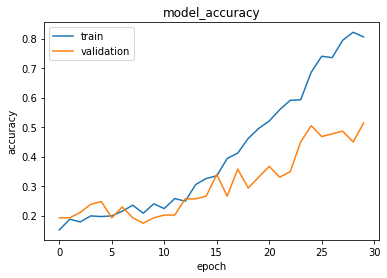

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')

In [ ]:
drive.flush_and_unmount()